<H2> Car price prediction using Kneaesr neighbors model </h2>

In this project we will try to predict a car price based on various features using Knearest neighbor model.  
Data set can be found here - https://archive.ics.uci.edu/ml/datasets/automobile

In [239]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
cars = pd.read_csv('imports-85.data')

In [241]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


This is a .data file and not a pure csv file so it doesn't contain headers. this means we should remove the first line as header and enter the column headers manually.

In [242]:
column_names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars = pd.read_csv('imports-85.data',header=None,names=column_names)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [243]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Let's chose only relevant numeric columns

In [244]:
cols = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
numeric_cars = cars[cols].copy()
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-null object
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


After examining the data we can say that according to the info there are no missing value but looking at the data we see that there are '?' vaules which we should be considering as None.  
so let's replace them


In [245]:
numeric_cars.replace('?',np.nan,inplace=True)
numeric_cars = numeric_cars.astype('float')

In [246]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


There are also a few rows that don't have price and since this is our target column we should remove all the rows that have None values there

In [247]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [248]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


There are still too many missing values in the normalized_losses and if we remove those line we would lose about 25% of the whole data set so we should plug in the mean value instead in order not to lose valuable information. since there are a couple of more columns with missing values lets do that for the whole df

In [249]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [250]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


In [251]:
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

<h3>Normalization of the remaining values except for price </h3>

In [252]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

<h3>definin fthe training and testing function </h3>

In [253]:
def knn_train_test(train_col, target_col, df,k):
    df = df.sample(frac=1, random_state = 1)
    num = round(df.shape[0] / 2) 
    train_set = df.iloc[0:num]
    test_set = df.iloc[num:]
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_set[[train_col]], train_set[target_col])
    predictions = knn.predict(test_set[[train_col]])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [254]:
# testing on univariate models

columns = ['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']
target = 'price'
univar_rmse = []
for col in columns:
    rmse_score = knn_train_test(col, target,numeric_cars,5)
    univar_rmse.append(rmse_score)

cols_scores = pd.Series(univar_rmse, index =columns) 

print(cols_scores.sort_values())

engine_size          3216.836576
horsepower           4032.384802
curb_weight          4400.623175
width                4650.528354
city_mpg             4830.919061
highway_mpg          4894.959095
length               5422.194354
wheel_base           5510.424430
compression_ratio    6840.976896
bore                 6992.745784
peak_rpm             7295.489962
normalized_losses    7581.611023
height               7764.001175
stroke               8289.581568
dtype: float64


now we will test it with different K values

In [255]:
k_nums = [1,3,5,7,9]
rmse_dict = {}
k_dict = {}
for col in columns:
    k_dict = {}
    for num in k_nums:
        rmse_score = knn_train_test(col, target,numeric_cars,num)
        k_dict[num] = rmse_score        
    rmse_dict[col] = k_dict


rmse_dict



{'bore': {1: 7554.9512176446315,
  3: 6870.122285026746,
  5: 6992.745783685227,
  7: 6846.130978887037,
  9: 6932.63573820032},
 'city_mpg': {1: 4999.6926667922535,
  3: 4665.399526693761,
  5: 4830.9190611975255,
  7: 5156.33162181214,
  9: 5324.822735078125},
 'compression_ratio': {1: 7917.579731956047,
  3: 6319.886594524997,
  5: 6840.976895643827,
  7: 6614.376984425625,
  9: 6747.419859657354},
 'curb_weight': {1: 5496.150727716825,
  3: 5055.228940548997,
  5: 4400.6231752215535,
  7: 4367.669511999935,
  9: 4634.055301484907},
 'engine_size': {1: 3475.2810813025476,
  3: 2790.45642413665,
  5: 3216.8365762064755,
  7: 3631.9860373729207,
  9: 3782.8088507736234},
 'height': {1: 8931.134984917195,
  3: 8025.141653986966,
  5: 7764.001175417297,
  7: 7613.249014705291,
  9: 7664.919593082149},
 'highway_mpg': {1: 6308.517418522515,
  3: 4686.072257255539,
  5: 4894.959094844207,
  7: 5144.27150086394,
  9: 5274.5968079437935},
 'horsepower': {1: 3625.4304121396854,
  3: 4028.605

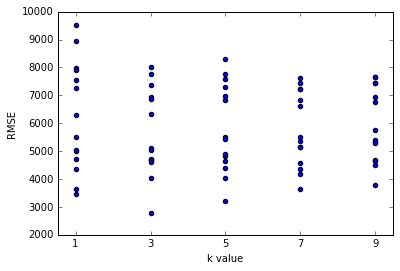

In [256]:
for k,v in rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xticks(x)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

<h3> choosing best features - multiple </h3>

In [257]:
best2 = ['engine_size','horsepower']
best3 = ['engine_size','horsepower','curb_weight']
best4 = ['engine_size','horsepower','curb_weight','width']
best5 = ['engine_size','horsepower','curb_weight','width','city_mpg']

def knn_train_test_multi(train_col, target_col, df,k):
    df = df.sample(frac=1,random_state = 1 )
    num = round(df.shape[0] / 2) 
    train_set = df.iloc[0:num]
    test_set = df.iloc[num:]
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute')
    knn.fit(train_set[train_col], train_set[target_col])
    predictions = knn.predict(test_set[train_col])
    mse = mean_squared_error(test_set[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse


In [258]:
rmse2 = knn_train_test_multi(best2, target,numeric_cars,5)
rmse3 = knn_train_test_multi(best3, target,numeric_cars,5)
rmse4 = knn_train_test_multi(best4, target,numeric_cars,5)
rmse5 = knn_train_test_multi(best5, target,numeric_cars,5)

print(rmse2, rmse3, rmse4, rmse5)

2950.255443479798 3423.7806300019042 3487.340917327035 3360.832156381264


The best score was produced by ['engine_size','horsepower']

lets check for the top 3 results how the scores look like with a k between 1-25

In [263]:
columns = [['engine_size','horsepower'],  
           ['engine_size','horsepower','curb_weight','width','city_mpg'],
           ['engine_size','horsepower','curb_weight']]

k_nums = [i for i in range(1,25)]
rmse_dict = {}
k_dict = {}
for col in columns:
    k_dict = {}
    name = 'best' + str(len(col))
    for num in k_nums:
        rmse_score = knn_train_test_multi(col, target,numeric_cars,num)
        k_dict[num] = rmse_score        
    rmse_dict[name] = k_dict


rmse_dict

{'best2': {1: 2778.412353831013,
  2: 2687.9334815039783,
  3: 2789.39413024789,
  4: 2844.017557427423,
  5: 2950.255443479798,
  6: 3126.834022873721,
  7: 3200.8528818656673,
  8: 3424.405007309176,
  9: 3795.071527944163,
  10: 4053.0191267232085,
  11: 4196.411552925728,
  12: 4291.10153777815,
  13: 4373.189415251453,
  14: 4436.692413218319,
  15: 4535.5607493913185,
  16: 4683.374103096778,
  17: 4735.934386461075,
  18: 4790.502218673963,
  19: 4832.899261955802,
  20: 4826.300758211497,
  21: 4826.603967910308,
  22: 4834.922165632155,
  23: 4853.64023616901,
  24: 4891.267108611846},
 'best3': {1: 3149.531126506243,
  2: 3006.8527586791206,
  3: 3016.7069750967457,
  4: 3144.0022399446902,
  5: 3423.7806300019042,
  6: 3490.5763474458963,
  7: 3734.328302612299,
  8: 3936.1203798667007,
  9: 3976.993564706222,
  10: 4131.019054304846,
  11: 4214.261884374978,
  12: 4230.509703492906,
  13: 4176.9263852045715,
  14: 4292.026769200401,
  15: 4384.156891479696,
  16: 4418.52562

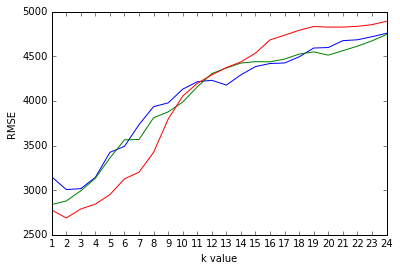

In [265]:
for k,v in rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xticks(x)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

<h3>so it looks like the best k value is around 2 and the bigger it gets the worse the RMSE gets</h3>